In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,5)

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls


Data source: https://conferences.unite.un.org/UNCorpus
Alternate source: 


In [254]:
df_full = pd.read_csv("readability_results.csv", sep=";")
df_full = df_full[df_full["DaleChall_min_age"]>0]

In [255]:
df_full.head(5)

,path,symbol,root,organ,date,FleschKincaid_score,FleschKincaid_min_age,FleschReading_score,FleschReading_min_age,DaleChall_score,DaleChall_min_age,ColemanLiau_score,ColemanLiau_min_age,LinsearWrite_score,LinsearWrite_min_age,SMOG_score,SMOG_min_age,ARI_score,ARI_min_age
0,./files/UNv1.0-TEI/en/2013/cat/sp/14/2/add_3.xml,CAT/SP/14/2/ADD.3,CAT,Human Rights TB,20130923,6.975313,12,58.972157,0,17.507527,23,9.756588,15,4.425926,9,10.168813,15,5.982763,11
1,./files/UNv1.0-TEI/en/2013/cat/sp/14/2/add_2.xml,CAT/SP/14/2/ADD.2,CAT,Human Rights TB,20130902,6.863465,12,59.774053,0,17.507527,23,9.589384,15,4.388889,9,10.082433,15,5.848829,11
2,./files/UNv1.0-TEI/en/2013/cat/sp/14/2/add_1.xml,CAT/SP/14/2/ADD.1,CAT,Human Rights TB,20130827,6.829048,12,59.954841,0,17.466135,22,9.458286,14,4.333333,9,9.994967,15,5.739746,11
3,./files/UNv1.0-TEI/en/2013/cat/sp/14/2.xml,CAT/SP/14/2,CAT,Human Rights TB,20130718,10.690489,16,42.136429,0,19.388334,24,14.352871,19,8.632992,14,13.611120,19,11.162061,16
4,./files/UNv1.0-TEI/en/2013/cat/sp/14/1.xml,CAT/SP/14/1,CAT,Human Rights TB,20130715,5.592126,11,62.340000,0,17.605158,23,5.956667,11,1.793103,7,7.990435,13,3.796466,9


In [256]:
df_full.describe()

,FleschKincaid_score,FleschKincaid_min_age,FleschReading_score,FleschReading_min_age,DaleChall_score,DaleChall_min_age,ColemanLiau_score,ColemanLiau_min_age,LinsearWrite_score,LinsearWrite_min_age,SMOG_score,SMOG_min_age,ARI_score,ARI_min_age
count,159310.000000,159310.000000,159310.000000,159310.0,159310.000000,159310.000000,159310.000000,159310.000000,159310.000000,159310.000000,159310.000000,159310.000000,159310.000000,159310.000000
mean,11.172099,16.169305,45.372653,0.0,18.232090,23.230463,12.359175,17.359595,11.696343,16.702561,12.768004,17.776022,11.394007,16.395110
std,3.204934,3.217863,12.496975,0.0,1.069019,1.102182,2.736253,2.746876,5.415598,5.423221,2.568659,2.586264,4.229163,4.238575
min,-2.230000,3.000000,-30.852849,0.0,9.290500,14.000000,-20.885688,0.000000,-0.500000,5.000000,3.129100,8.000000,-8.919203,0.000000
25%,8.899412,14.000000,36.986563,0.0,17.604027,23.000000,10.998093,16.000000,7.394518,12.000000,11.003577,16.000000,8.449683,13.000000
50%,11.277692,16.000000,44.604000,0.0,18.104259,23.000000,12.829220,18.000000,11.984848,17.000000,12.801484,18.000000,11.630326,17.000000
75%,13.306325,18.000000,53.479151,0.0,18.658250,24.000000,14.195047,19.000000,15.253344,20.000000,14.458980,19.000000,14.274816,19.000000
max,39.134501,44.000000,118.175000,0.0,26.645040,32.000000,22.638719,28.000000,60.416667,65.000000,29.411872,34.000000,47.362809,52.000000


In [257]:
df_full[["FleschKincaid_min_age","DaleChall_min_age","ColemanLiau_min_age",
          "LinsearWrite_min_age","SMOG_min_age","ARI_min_age"]].describe()

,FleschKincaid_min_age,DaleChall_min_age,ColemanLiau_min_age,LinsearWrite_min_age,SMOG_min_age,ARI_min_age
count,159310.000000,159310.000000,159310.000000,159310.000000,159310.000000,159310.000000
mean,16.169305,23.230463,17.359595,16.702561,17.776022,16.395110
std,3.217863,1.102182,2.746876,5.423221,2.586264,4.238575
min,3.000000,14.000000,0.000000,5.000000,8.000000,0.000000
25%,14.000000,23.000000,16.000000,12.000000,16.000000,13.000000
50%,16.000000,23.000000,18.000000,17.000000,18.000000,17.000000
75%,18.000000,24.000000,19.000000,20.000000,19.000000,19.000000
max,44.000000,32.000000,28.000000,65.000000,34.000000,52.000000


[(0, 80000),
 (0, 80000),
 (0, 80000),
 (0, 80000),
 (0, 80000),
 (0, 80000),
 (0, 80000),
 (0, 80000),
 (0, 80000)]

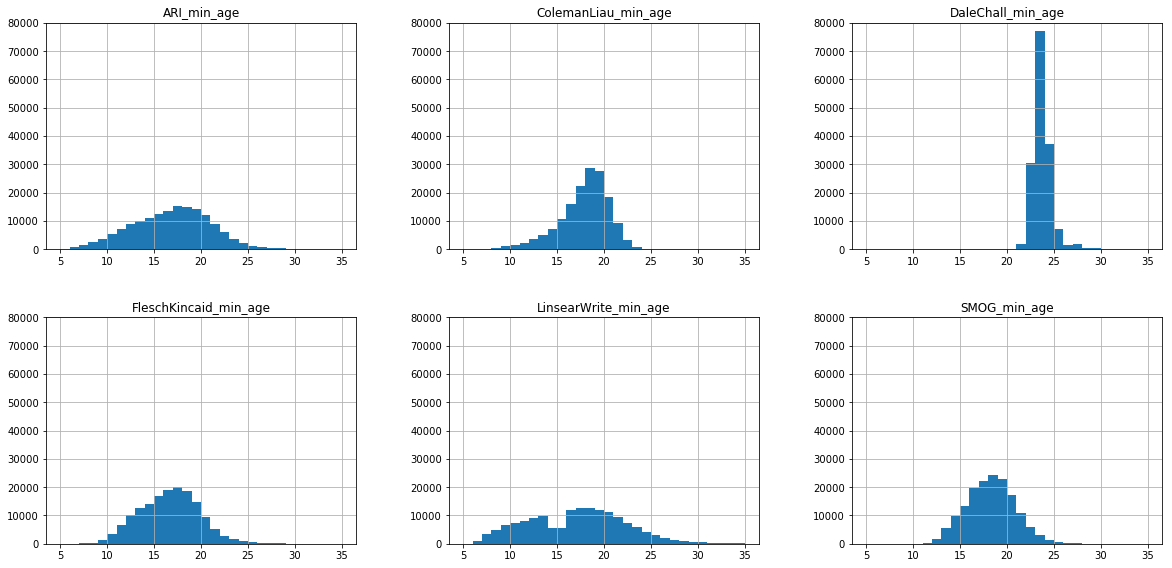

In [241]:
(df_full[["FleschKincaid_min_age","DaleChall_min_age","ColemanLiau_min_age",
          "LinsearWrite_min_age","SMOG_min_age","ARI_min_age"]]
        .hist(figsize=(20, 15), range=[5, 35], bins=30, layout=(3,3))
)
[ax.set_ylim([0, 80000]) for ax in plt.gcf().get_axes()]
#del df_full

In [7]:

#this second dataset includes FleschKincaid and DaleChall only
df = pd.read_csv("readability_results_final.csv", sep=";")
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d", errors='coerce')

In [8]:
df.head(5)

,path,symbol,root,organ,date,FleschKincaid_score,FleschKincaid_min_age,DaleChall_score,DaleChall_min_age
0,./files/UNv1.0-TEI/en/2013/cat/sp/14/2/add_3.xml,CAT/SP/14/2/ADD.3,CAT,Human Rights TB,2013-09-23,6.97531,12,17.50753,23
1,./files/UNv1.0-TEI/en/2013/cat/sp/14/2/add_2.xml,CAT/SP/14/2/ADD.2,CAT,Human Rights TB,2013-09-02,6.86346,12,17.50753,23
2,./files/UNv1.0-TEI/en/2013/cat/sp/14/2/add_1.xml,CAT/SP/14/2/ADD.1,CAT,Human Rights TB,2013-08-27,6.82905,12,17.46613,22
3,./files/UNv1.0-TEI/en/2013/cat/sp/14/2.xml,CAT/SP/14/2,CAT,Human Rights TB,2013-07-18,10.69049,16,19.38833,24
4,./files/UNv1.0-TEI/en/2013/cat/sp/14/1.xml,CAT/SP/14/1,CAT,Human Rights TB,2013-07-15,5.59213,11,17.60516,23


In [9]:
df.describe()

,FleschKincaid_score,FleschKincaid_min_age,DaleChall_score,DaleChall_min_age
count,159304.000000,159304.000000,159304.000000,159304.000000
mean,11.172194,16.169399,18.232079,23.230459
std,3.204925,3.217856,1.068976,1.102154
min,-2.230000,3.000000,9.290500,14.000000
25%,8.899757,14.000000,17.604030,23.000000
50%,11.277705,16.000000,18.104255,23.000000
75%,13.306360,18.000000,18.658252,24.000000
max,39.134500,44.000000,26.645040,32.000000


(0, 127000)

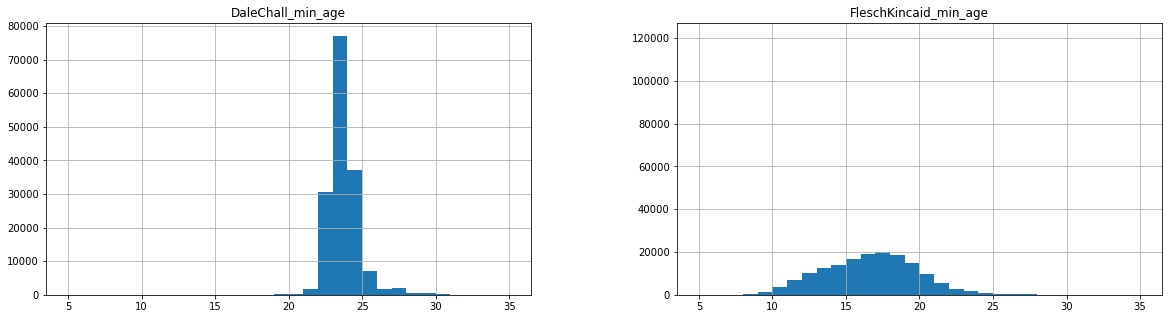

In [10]:
df[["FleschKincaid_min_age","DaleChall_min_age"]].hist(range=[5, 35], bins=30)
axes = plt.gca()
axes.set_ylim([0,127000])

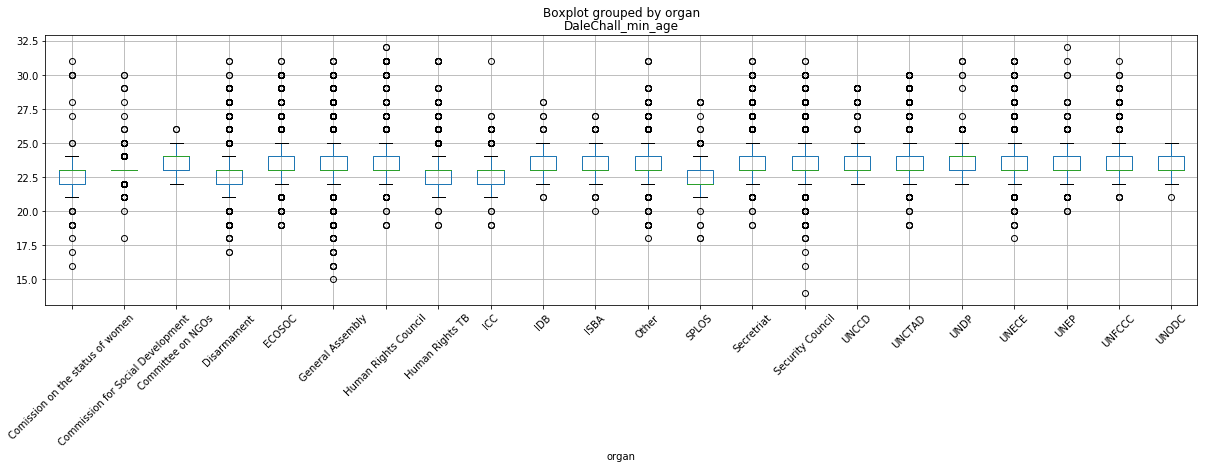

In [11]:
df.sort_values("organ").boxplot(column='DaleChall_min_age', by = 'organ', rot=45)

In [12]:
#describe DaleChall by group
df.groupby('organ').describe()

dfdDC = pd.DataFrame(group.describe().rename(columns={'DaleChall_min_age':organ}).squeeze()
                         for organ, group in df[["organ","DaleChall_min_age"]].groupby('organ'))
dfdDC.sort_values("count", ascending=False, inplace=True)

#running totals
dfdDC['cum_sum'] = dfdDC["count"].cumsum()
dfdDC['cum_perc'] = round(100*dfdDC.cum_sum/dfdDC["count"].sum(),1)

#top-10 covers over 90% of the count
dfdDC.head(10)[["count","cum_perc"]].rename(columns={"count":"docs","cum_perc":"%"})


,docs,%
General Assembly,53553.0,33.6
Security Council,27848.0,51.1
UNECE,19288.0,63.2
ECOSOC,15083.0,72.7
Human Rights TB,11726.0,80.0
Human Rights Council,5188.0,83.3
Secretriat,4846.0,86.3
Other,4146.0,88.9
Disarmament,3964.0,91.4
UNCTAD,2926.0,93.3


In [13]:
## find the top organs by counts
toporgans = (df[["organ","symbol"]].groupby(["organ"])
 .size().to_frame(name='count')
 .reset_index()
 .sort_values("count", ascending=False).head(10)
 .sort_values("organ")
)["organ"].values.tolist()

print(toporgans)


['Disarmament', 'ECOSOC', 'General Assembly', 'Human Rights Council', 'Human Rights TB', 'Other', 'Secretriat', 'Security Council', 'UNCTAD', 'UNECE']


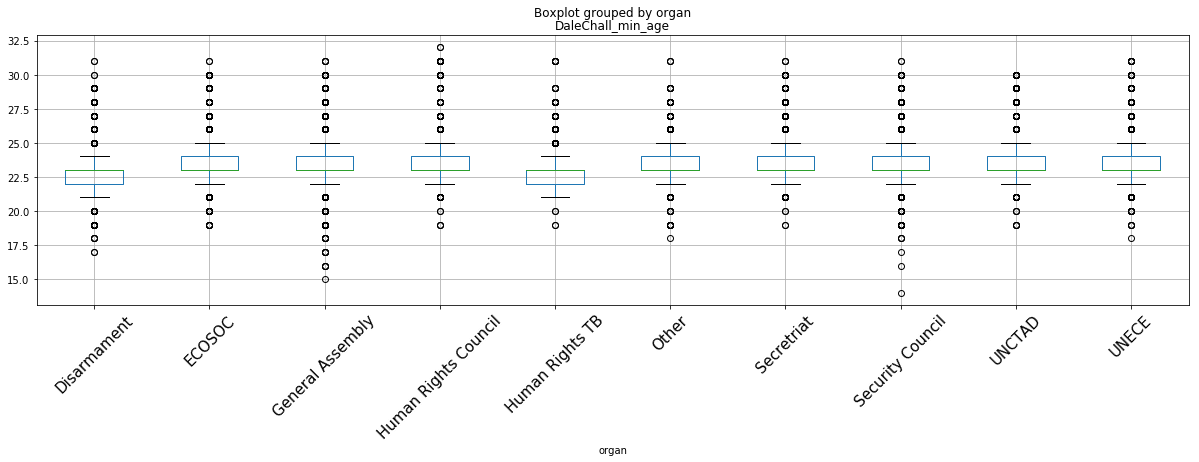

In [14]:
(
df[df["organ"].isin(toporgans)].sort_values("organ")
 .boxplot(column='DaleChall_min_age', by = 'organ', rot=45, fontsize=15)
)

In [15]:
#describe FleschKincaid by group

dfdFK = pd.DataFrame(group.describe().rename(columns={'FleschKincaid_min_age':organ}).squeeze()
                         for organ, group in df[["organ","FleschKincaid_min_age"]].groupby('organ'))

dfdFK.sort_values("count", ascending=False, inplace=True)
                     
#running totals
dfdFK['cum_sum'] = dfdFK["count"].cumsum()
dfdFK['cum_perc'] = 100*dfdFK.cum_sum/dfdFK["count"].sum()

#top-10 covers over 90% of the count
dfdFK.head(10)


,count,mean,std,min,25%,50%,75%,max,cum_sum,cum_perc
General Assembly,53553.0,16.776763,3.008330,6.0,15.0,17.0,19.0,39.0,53553.0,33.616858
Security Council,27848.0,16.414177,4.022403,6.0,13.0,16.0,19.0,44.0,81401.0,51.097901
UNECE,19288.0,13.940792,2.489095,3.0,12.0,14.0,16.0,26.0,100689.0,63.205569
ECOSOC,15083.0,16.679440,2.784806,3.0,15.0,17.0,18.0,31.0,115772.0,72.673630
Human Rights TB,11726.0,16.243561,2.510539,4.0,15.0,17.0,18.0,25.0,127498.0,80.034400
Human Rights Council,5188.0,16.882999,2.520859,6.0,16.0,17.0,18.0,30.0,132686.0,83.291066
Secretriat,4846.0,13.220182,2.518951,4.0,11.0,13.0,15.0,23.0,137532.0,86.333049
Other,4146.0,15.944525,2.941539,6.0,14.0,16.0,18.0,27.0,141678.0,88.935620
Disarmament,3964.0,16.801968,2.853366,6.0,15.0,17.0,19.0,29.0,145642.0,91.423944
UNCTAD,2926.0,15.643541,2.795920,7.0,14.0,16.0,18.0,27.0,148568.0,93.260684


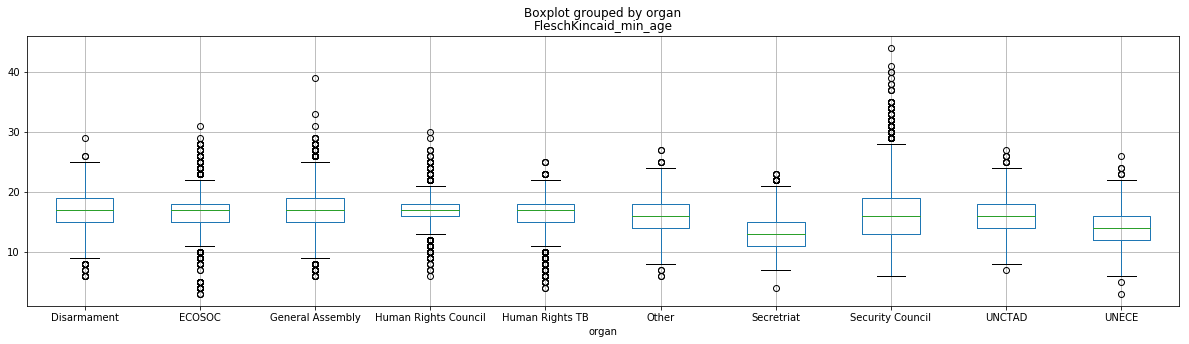

In [16]:
df[df["organ"].isin(toporgans)].sort_values("organ").boxplot(column='FleschKincaid_min_age', by = 'organ')



In [17]:
colors = ["rgb(116,157,20)",
"rgb(97,0,171)",
"rgb(54,204,233)",
"rgb(0,18,113)",
"rgb(255,215,93)",
"rgb(213,97,165)",
"rgb(117,203,159)",
"rgb(193,83,66)",
"rgb(154,160,167)",
"rgb(152,0,103)"]

color_map = dict(zip(toporgans, colors))

In [18]:

#plotly

traces=[]
for organ in toporgans:
    traces.append(go.Box(
        y=df[df["organ"]==organ]["DaleChall_min_age"],
        name=organ,
        boxpoints="outliers",
        jitter=0.5,
        whiskerwidth=0.2,
        fillcolor=color_map[organ],
        marker=dict(size=2, color=color_map[organ]),
        text = df[df["organ"]==organ]["symbol"],
        line=dict(width=1)
    ))

layout = go.Layout(
    title="Dale-Chall Min Age",
        yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(254, 254, 254)',
    plot_bgcolor='rgb(254, 254, 254)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)



/opt/conda/lib/python3.6/site-packages/plotly/plotly/plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



(15, 35)

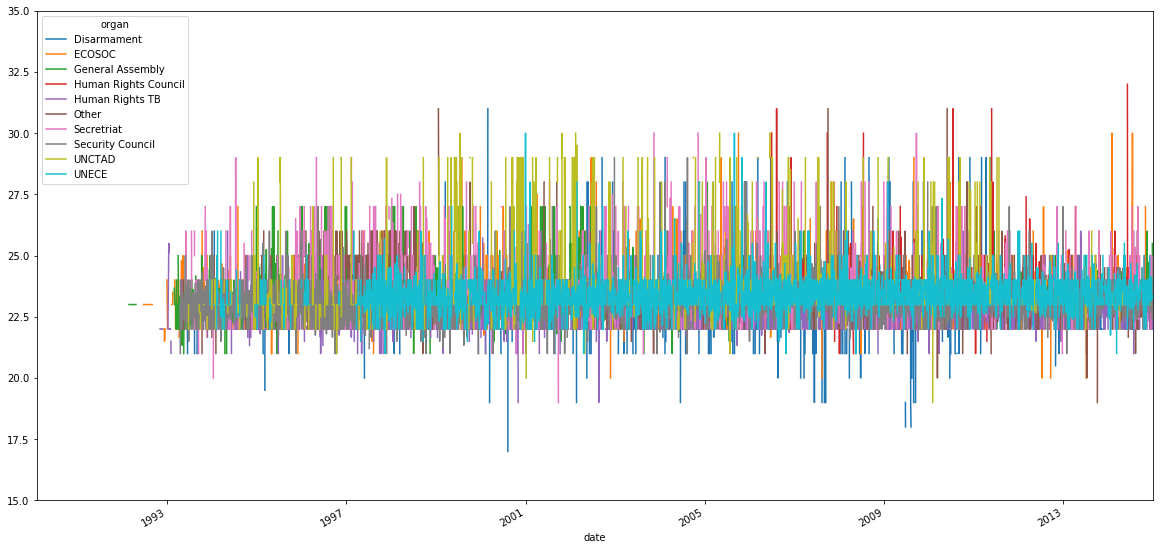

In [19]:
#evolution of the score, per organ
(df[df["organ"].isin(toporgans)]
    .groupby(["date","organ"]).mean()
    ["DaleChall_min_age"]
     .unstack()
).plot(figsize=(20,10))
plt.gca().set_ylim([15,35])



In [32]:

dfT = (df[df["organ"].isin(toporgans)]
    .groupby(["date","symbol","organ"]).mean()
    ["DaleChall_min_age"]
    .unstack()
    .reset_index()
    .groupby(pd.Grouper(key="date", freq='Q')).mean()
)
dfT.head(5)

organ,Disarmament,ECOSOC,General Assembly,Human Rights Council,Human Rights TB,Other,Secretriat,Security Council,UNCTAD,UNECE
date,,,,,,,,,,
1990-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
1990-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(20, 30)

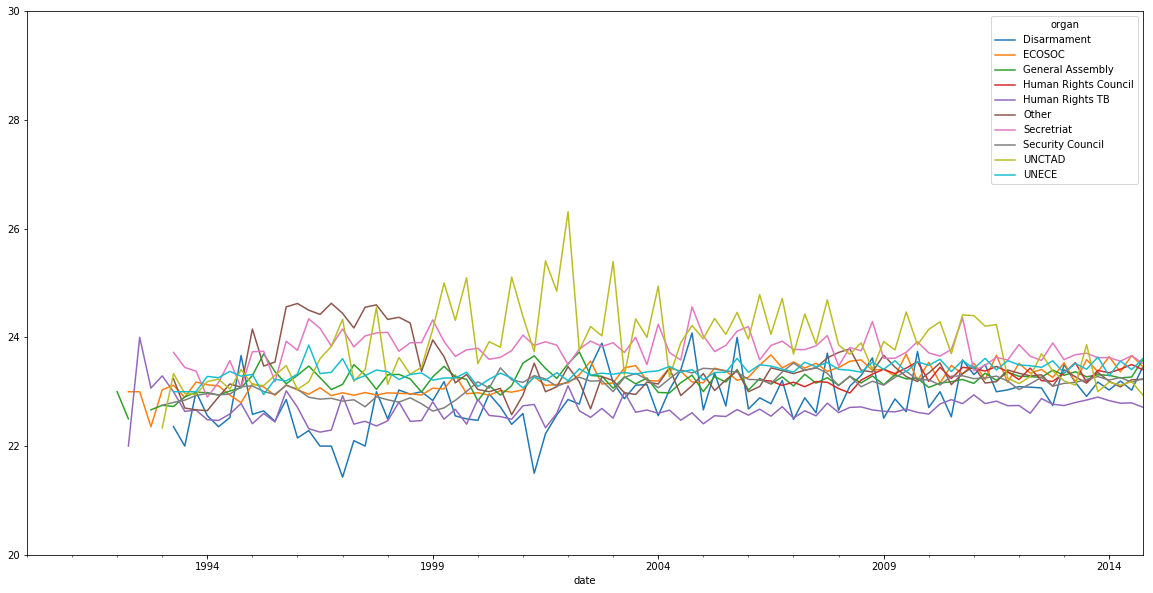

In [21]:
dfT.plot(figsize=(20, 10))
plt.gca().set_ylim([20,30])


In [162]:
#plotly


traces=[]
for organ in toporgans:
    traces.append(
        
        go.Scatter(
            x = dfT.index,
            y = dfT[organ],
            name = organ,
            line = dict(
                color = color_map[organ],
                width = 2,
                shape='spline'
            )
        )
    )


layout = go.Layout(
    title="Dale-Chall Min Age per Quarter (mean)",
    yaxis=dict(
        range=[20,28],
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(254, 254, 254)',
    plot_bgcolor='rgb(254, 254, 254)',
    showlegend=True,
    legend=dict(orientation="h")
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

In [221]:
#documents per quarter
dfpQ=(df[df["organ"].isin(toporgans)][["symbol","organ","date"]]
     .groupby(["date", "organ"]).count()
     .reset_index()
     .groupby([pd.Grouper(key="date", freq='Q'), "organ"]).sum()
            ["symbol"]
     .unstack(1)
)
dfpQ = dfpQ[dfpQ.index.year>1993]
dfpQ

organ,Disarmament,ECOSOC,General Assembly,Human Rights Council,Human Rights TB,Other,Secretriat,Security Council,UNCTAD,UNECE
date,,,,,,,,,,
1994-03-31,25.0,275.0,835.0,NaN,70.0,23.0,30.0,423.0,43.0,39.0
1994-06-30,14.0,204.0,379.0,NaN,68.0,21.0,29.0,487.0,39.0,31.0
1994-09-30,21.0,129.0,589.0,NaN,44.0,14.0,28.0,393.0,41.0,16.0
1994-12-31,3.0,109.0,999.0,NaN,83.0,12.0,27.0,398.0,27.0,14.0
1995-03-31,53.0,211.0,757.0,NaN,85.0,13.0,34.0,287.0,45.0,44.0
1995-06-30,119.0,126.0,443.0,NaN,70.0,36.0,43.0,327.0,44.0,19.0
1995-09-30,35.0,75.0,589.0,NaN,45.0,11.0,49.0,309.0,63.0,22.0
1995-12-31,7.0,71.0,888.0,NaN,58.0,41.0,42.0,256.0,27.0,10.0
1996-03-31,20.0,247.0,660.0,NaN,129.0,61.0,63.0,282.0,24.0,40.0


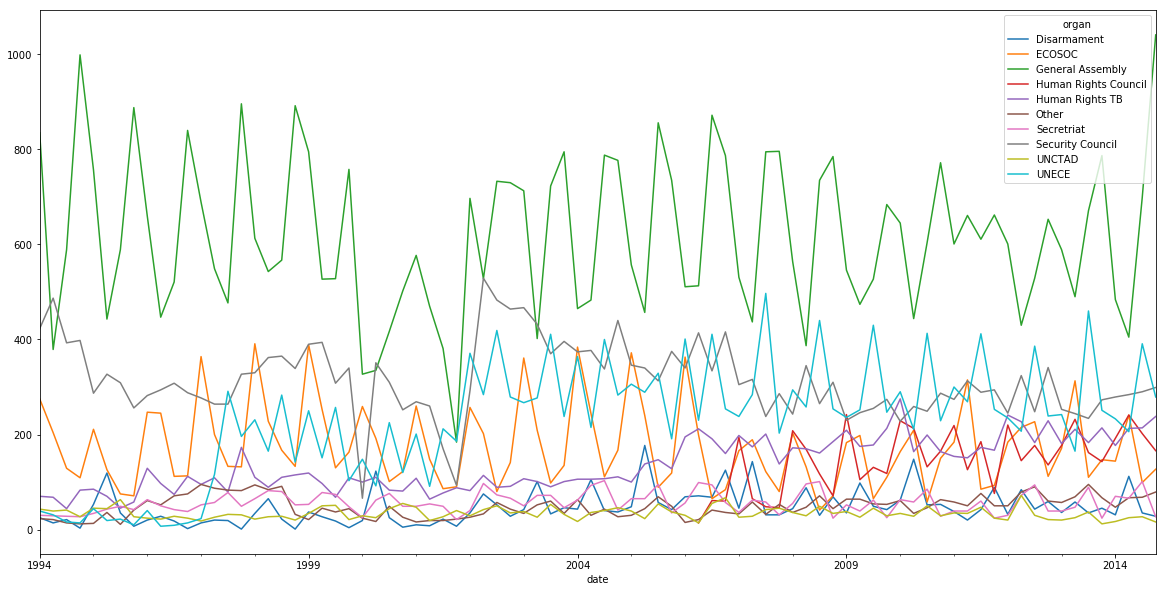

In [222]:
dfpQ.plot(figsize=(20, 10))

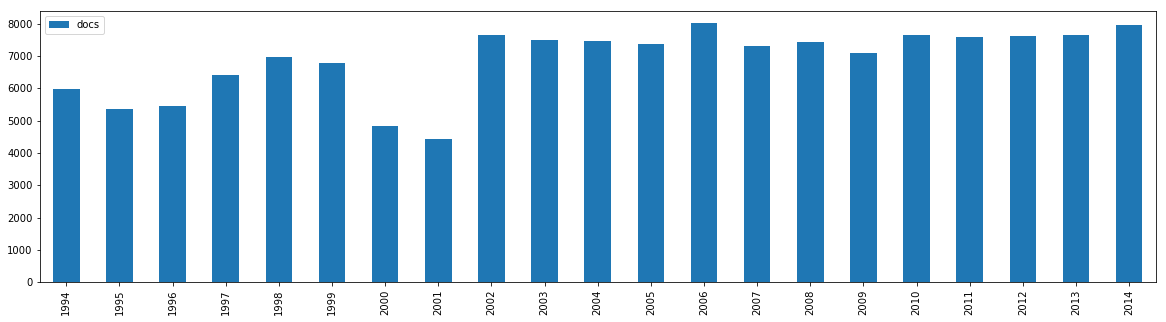

In [224]:
dfdY = (dfpQ.stack().reset_index()
 .rename(columns={0:"docs"})
 .groupby(pd.Grouper(key="date", freq='A')).sum()
# .reset_index()
)
dfdY.index = dfdY.index.strftime('%Y')
dfdY.plot.bar()

In [171]:
#plotly


traces=[]
for organ in toporgans:
    traces.append(
        
        go.Scatter(
            x = dfpQ.index,
            y = dfpQ[organ],
            name = organ,
            line = dict(
                color = color_map[organ],
                width = 2,
                shape='spline'
            )
        )
    )


layout = go.Layout(
    title="Number of documents per Quarter",
    yaxis=dict(
        showgrid=True,
        zeroline=True,
        dtick=100,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(254, 254, 254)',
    plot_bgcolor='rgb(254, 254, 254)',
    showlegend=True,
    legend=dict(orientation="h")
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

